In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [3]:
drug_df = pd.read_csv('drug200.csv')
drug_df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [4]:
# General info about dataset
drug_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


<AxesSubplot:title={'center':'AGE DISTRIBUTION'}, ylabel='Density'>

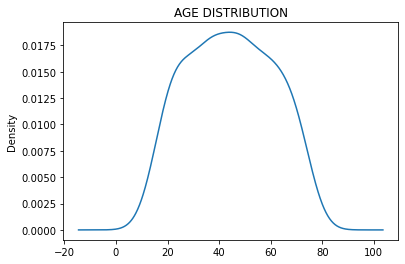

In [5]:
plt.title("AGE DISTRIBUTION")
drug_df['Age'].plot(kind='kde')

In [6]:
print(f"Mean age is {drug_df['Age'].mean()}")

Mean age is 44.315


<AxesSubplot:title={'center':'Gender Distribution'}, xlabel='Sex', ylabel='count'>

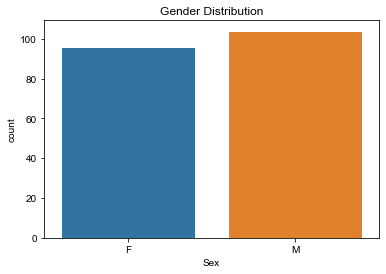

In [7]:
plt.title("Gender Distribution")
sns.set_style("darkgrid")
sns.countplot(x=drug_df.Sex)

In [8]:
print("We can see that there is almost an equal distribution of male and female.")

We can see that there is almost an equal distribution of male and female.


In [9]:
drug_df['Drug'].value_counts()

DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64

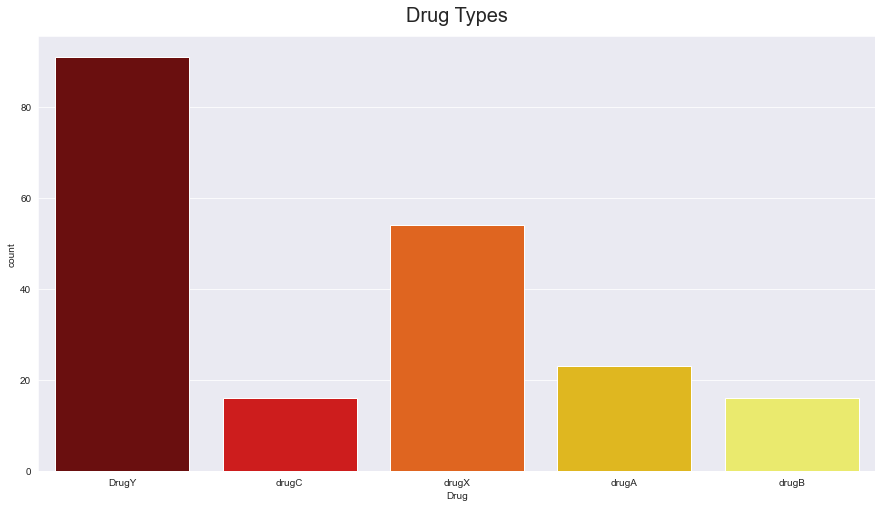

In [10]:
plt.figure(figsize=(15,8))
plt.title("Drug Types", fontsize=20, y=1.02)
sns.countplot(x = drug_df.Drug, palette="hot")
plt.show()

In [11]:
print("Drug Y is most commonly used and Drug C is least commonly used")

Drug Y is most commonly used and Drug C is least commonly used


<AxesSubplot:xlabel='Drug', ylabel='Age'>

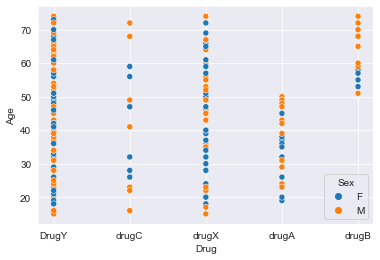

In [12]:
sns.scatterplot(x='Drug',y='Age',hue='Sex',data=drug_df)

In [13]:
print("We find that Drug B is used by people over age 50 and drug A is used by people under 50")

We find that Drug B is used by people over age 50 and drug A is used by people under 50


<AxesSubplot:title={'center':'Blood Pressure'}, xlabel='BP', ylabel='count'>

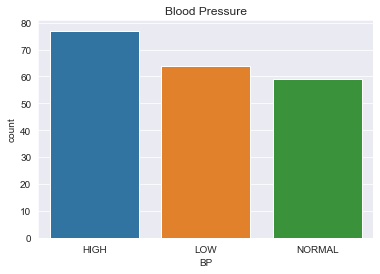

In [14]:
plt.title("Blood Pressure")
sns.countplot(x=drug_df.BP)

<AxesSubplot:xlabel='Drug', ylabel='count'>

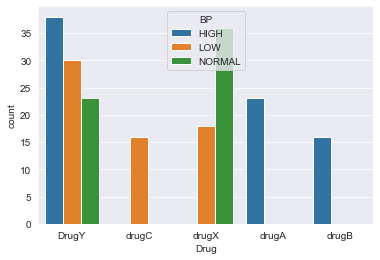

In [15]:
sns.countplot(x='Drug',hue='BP',data = drug_df)

<AxesSubplot:xlabel='Drug', ylabel='Na_to_K'>

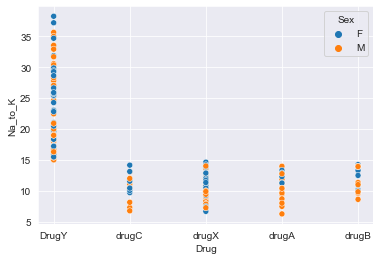

In [16]:
sns.scatterplot(x='Drug',y="Na_to_K",hue='Sex',data=drug_df)

In [17]:
# one hot encoder
drug_df['Sex'] = drug_df['Sex'].map({'M': 1, 'F': 2})
drug_df['BP'] = drug_df['BP'].map({'HIGH': 1, "NORMAL" : 2, "LOW" : 3})
drug_df['Cholesterol'] = drug_df['Cholesterol'].map({'HIGH': 1, "NORMAL" : 2})
drug_df["Drug"] = drug_df["Drug"].map({"DrugY":1, "drugC":2, "drugX":3, "drugA":4, "drugB":5})

In [18]:
drug_df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,2,1,1,25.355,1
1,47,1,3,1,13.093,2
2,47,1,3,1,10.114,2
3,28,2,2,1,7.798,3
4,61,2,3,1,18.043,1


In [24]:
X = drug_df.drop('Drug',axis=1)
y = drug_df['Drug']

In [25]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X = sc.fit_transform(X)
X

array([[-1.29159102,  1.040833  , -1.11692063, -0.97043679,  1.28652212],
       [ 0.16269866, -0.96076892,  1.2722144 , -0.97043679, -0.4151454 ],
       [ 0.16269866, -0.96076892,  1.2722144 , -0.97043679, -0.82855818],
       [-0.988614  ,  1.040833  ,  0.07764689, -0.97043679, -1.14996267],
       [ 1.0110343 ,  1.040833  ,  1.2722144 , -0.97043679,  0.27179427],
       [-1.35218642,  1.040833  ,  0.07764689, -0.97043679, -1.03769314],
       [ 0.28388946,  1.040833  ,  0.07764689, -0.97043679,  0.02643885],
       [-0.20087376, -0.96076892,  1.2722144 , -0.97043679, -0.70046821],
       [ 0.9504389 , -0.96076892,  0.07764689, -0.97043679, -0.12676951],
       [-0.07968296, -0.96076892,  1.2722144 ,  1.03046381,  0.45567206],
       [ 0.16269866,  1.040833  ,  1.2722144 , -0.97043679, -0.59916196],
       [-0.62504158,  1.040833  , -1.11692063,  1.03046381,  0.43221897],
       [-0.07968296, -0.96076892,  1.2722144 , -0.97043679, -0.09832049],
       [ 1.79877454,  1.040833  ,  1.2

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
len(X_train),len(X_test)

(160, 40)

## Decision Tree

In [28]:
model = DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [29]:
print(f"Accuracy score for Decision Tree Classifier is {model.score(X_test,y_test)*100}")

Accuracy score for Decision Tree Classifier is 100.0


<AxesSubplot:>

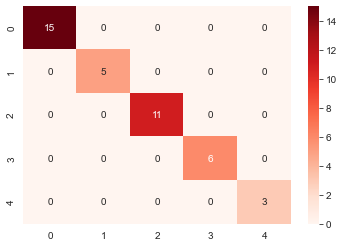

In [30]:
# Plotting the confusion matrix for this model
predict = model.predict(X_test)
cf = confusion_matrix(y_test,predict)
sns.heatmap(cf, cmap='Reds',annot=True)

In [31]:
# Classification report for Decision Tree Classifier
from sklearn import metrics
print(metrics.classification_report(y_test,predict))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00        11
           4       1.00      1.00      1.00         6
           5       1.00      1.00      1.00         3

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



## SVM

In [32]:
from sklearn.svm import SVC

model = SVC()
model.fit(X_train,y_train)

SVC()

In [35]:
print(f"Accuracy score for Decision Tree Classifier is {model.score(X_test,y_test)*100}")

Accuracy score for Decision Tree Classifier is 97.5


<AxesSubplot:>

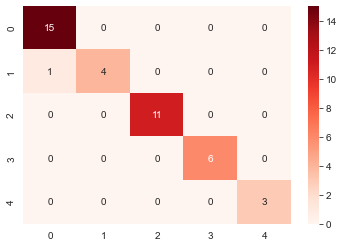

In [36]:
# Plotting the confusion matrix for this model
predict = model.predict(X_test)
cf = confusion_matrix(y_test,predict)
sns.heatmap(cf, cmap='Reds',annot=True)

In [37]:
# Classification report for SVM
print(metrics.classification_report(y_test,predict))

              precision    recall  f1-score   support

           1       0.94      1.00      0.97        15
           2       1.00      0.80      0.89         5
           3       1.00      1.00      1.00        11
           4       1.00      1.00      1.00         6
           5       1.00      1.00      1.00         3

    accuracy                           0.97        40
   macro avg       0.99      0.96      0.97        40
weighted avg       0.98      0.97      0.97        40

